<h2>FIN5622 Project #3
    <p class="text-primary">Loan Default Prediction with Random Forests</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will build a random forest model to predict borrower defaults on a set of loan performance data.
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5622_Project_3_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Read in the dataset "loan_performance_data_2016.csv" into a dataframe called <code>loans</code> using the pandas <code>pd.read_csv()</code> function. Check that there are 405,180 loans present in the dataframe.
    <br><br>
    Note that there are 16 feature columns and 1 target column (i.e. "loan_default") in this dataset. Please review the file "Loan_Data_Dictionary.xlsx" for definitions on each column.
    <p style="text-align:right;">[0pts]</p>
    </div>
</div>

In [2]:
loans = pd.read_csv("loan_performance_data_2016.csv")
loans

,loan_amnt,loan_term,int_rate,fico,dti,annual_income,income_verification,home_mortgage,home_own,home_rent,debt_consolidation,coborrower,num_accounts,revol_bal,revol_util,derogatory_records,loan_default
0,7.200,3.0,5.32,750,19.05,49.0,0,1,0,0,1,0,11,9.309,18.4,0,0
1,12.000,5.0,11.99,670,6.59,49.0,0,1,0,0,0,0,10,12.152,50.6,0,1
2,11.425,3.0,19.53,730,35.56,26.0,0,0,0,1,0,0,11,2.096,7.2,0,0
3,17.500,3.0,13.67,665,38.29,46.0,0,0,0,1,1,0,33,18.847,62.6,0,0
4,22.875,5.0,17.27,670,11.75,65.0,0,0,0,1,1,0,6,25.200,90.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405175,16.000,5.0,12.79,665,12.25,150.0,0,0,0,1,0,0,12,7.700,55.0,1,0
405176,24.000,5.0,12.79,665,19.61,95.0,0,1,0,0,0,0,5,49.431,84.4,0,0
405177,40.000,5.0,10.49,705,12.75,227.0,1,1,0,0,0,0,5,8.633,64.9,0,0
405178,24.000,5.0,14.49,660,18.30,110.0,0,0,0,1,1,0,10,17.641,68.1,1,1


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Use the function <code>train_test_split()</code> from the <code>sklearn.model_selection</code> module to split <code>loans</code> into training and test datasets. Provide the function with 2 separate numpy arrays, storing the features and target separately (like we did in class). Additionally, set the following optional paramters for the function to the values listed below:
    <ul>
        <li><code>test_size = .2</code></li>
        <li><code>random_state = 5622</code></li>
    </ul>
    <br>
    The function should return 4 outputs, representing the features and target for the training and test datasets, and store them as numpy arrays in variables called <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>. The training data should contain 80%, while the test data should contain 20%, of the original <code>loans</code> dataset. 
    <br><br>
    Check that each array shoud have the following shapes: 
    <ul>
        <li><code>X_train.shape = (324144, 16)</code></li>
        <li><code>X_test.shape = (81036, 16)</code></li>
        <li><code>y_train.shape = (324144,)</code></li>
        <li><code>y_test.shape = (81036,)</code></li>
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [3]:
loan_target = ["loan_default"]
loan_features = loans.drop("loan_default", axis = 1).columns.tolist()
loan_features, loan_target

(['loan_amnt',
  'loan_term',
  'int_rate',
  'fico',
  'dti',
  'annual_income',
  'income_verification',
  'home_mortgage',
  'home_own',
  'home_rent',
  'debt_consolidation',
  'coborrower',
  'num_accounts',
  'revol_bal',
  'revol_util',
  'derogatory_records'],
 ['loan_default'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
        loans[loan_features], loans[loan_target], test_size = .2 , random_state = 5622)

In [5]:
X_train.shape

(324144, 16)

In [6]:
X_test.shape

(81036, 16)

In [7]:
y_train.shape

(324144, 1)

In [8]:
y_test.shape

(81036, 1)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Fit a random forest model using the training dataset, <code>X_train</code> and <code>y_train</code>. Recall that this is done by calling <code>RandomForestClassifier()</code> from the <code>sklearn.ensemble</code> module, and using the <code>.fit()</code> method. Set <code>random_state = 5622</code> when initializing the random forest model. 
    <br><br>
    We will accept all default settings for this first random forest model. Specifically, the random forest will include 10 decision tree classifiers, no limit for tree depth, and no minimum leaf size. Store the fitted model in a variable called <code>rf_model_1</code>.
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [9]:
rf_model_1 = RandomForestClassifier(n_estimators = 10, random_state = 5622).fit(X_train, y_train.squeeze())

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Create a second random forest model, but changing the default settings to the below parameter values when calling <code>RandomForestClassifier()</code>: 
    <ul>
        <li><code>n_estimators = 50</code></li>
        <li><code>max_depth = 5</code></li>
        <li><code>min_samples_leaf = 5</code></li>
        <li><code>random_state = 5622</code></li>
    </ul>
    Fit the model using the <code>fit()</code> method on the training data, <code>X_train</code> and <code>y_train</code>, and save the model in a variable called <code>rf_model_2</code>.
    <br><br>
    Explain what each of the following parameters controls in the random forest model: 
    <ul>
        <li><code>n_estimators</code></li>
        <li><code>max_depth</code></li>
        <li><code>min_samples_leaf</code></li>
    </ul>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [10]:
rf_model_2 = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_leaf = 5, random_state = 5622).fit(X_train, y_train.squeeze())

To begin, the n_estimators paramteter establishes/controls the number of trees in the forest. 
max_depths, meanwhile controls the maximum depth of the trees.  Finally, min_samples_leaf is the minimum number of samples requierd to split an internal code. 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
     Assess the performance of both <code>rf_model_1</code> and <code>rf_model_2</code> on the test dataset <code>X_test</code> and <code>y_test</code> by:
    <ul>
        <li>Calculating the accuracy of the both model's predictions using the <code>.score()</code> method.</li>
        <li>Comparing the mean predicted probability of default, using the <code>.predict_proba()</code> method, against the actual observed rate of default for both models.</li>
        <li>Calculating the AUC for both models using the <code>roc_auc_score()</code> function from the <code>sklearn.metrics</code> module.</li>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [11]:
rf_model_1.score(loans[loan_features], loans[loan_target])

0.9425761389999506

In [12]:
rf_model_1.predict_proba(X_test)[:, 1].mean(), y_test.mean()

(0.2078890863320006,
 loan_default    0.195061
 dtype: float64)

In [13]:
y_prob_1 = rf_model_1.predict_proba(X_test)[:, 1]

In [14]:
roc_auc_score(y_test, y_prob_1)

0.6499845811865892

In [15]:
rf_model_2.score(loans[loan_features], loans[loan_target])

0.804119156917913

In [16]:
rf_model_2.predict_proba(X_test)[:, 1].mean(), y_test.mean()

(0.19648078233427232,
 loan_default    0.195061
 dtype: float64)

In [17]:
y_prob_2 = rf_model_2.predict_proba(X_test)[:, 1]

In [18]:
roc_auc_score(y_test, y_prob_2)

0.7122833152969601

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Review the performance assessment results calculated in the previous tasks for both models. 
    <br><br>
    Which model, <code>rf_model_1</code> or <code>rf_model_2</code>, performed better under each of the performance metrics calculated in the previous task (accuracy, actual vs. expected default probability, and AUC)? Explain which model was expected to perform better and why.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

rf_model_1 a higher score than rf_model_2 in terms of accuracy with a score of 0.9425761389999506 compared to 0.804119156917913.  This is because there are less parameters established in the first model, creating a higher accuracy.  However, in terms of actual vs expected default probability, the rf_model_2 performs better (20.7% vs 19.6%), and auc score (71% vs 65%) due to the fact that it implements the max_depth function and the min_samples_leaf function, unlike rf_model_1.  These functions in the second model control the depth of the trees as well as establish the minimum number of samples required to split the internal code - which allows this model to be a more effective indicator of default probability and AUC score. 


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Calculate the ROC curve for both <code>rf_model_1</code> and <code>rf_model_2</code>. Recall that ROC curves can be created using the function <code>roc_curve()</code> from the <code>sklearn.metrics</code> module.
    <br><br>
    Plot both the ROC curves on a single line plot. Recall that the ROC curve should be a upward-sloping and concaved curve above the 45-degree line. Provide axis labels, a legend, and a title for the plot. 
    <br><br>
    Your final plot should look like this:
        
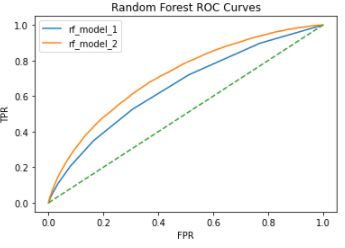
    <br>
    Which model has better performance according to the ROC plot? Why?
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

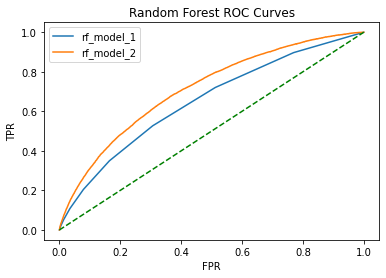

In [19]:
fpr, tpr, th = roc_curve(y_test, y_prob_1)
fpr_2, tpr_2, th_2 = roc_curve(y_test, y_prob_2)

plt.plot(fpr, tpr, label = "rf_model_1")
plt.plot(fpr_2, tpr_2, label = "rf_model_2")
plt.plot(fpr, fpr, linestyle = "--", color = "green")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title("Random Forest ROC Curves")
plt.legend()
plt.show()

rf_model_2 has better performance according to the ROC plot, thi i because rf_model_2 has a steeper curve.  By the ROC model,curves that are steeper towards the top left are better performers. 